In [4]:
# keep things reproducable by setting the random seed.
import random
random.seed(31415)

# Fun Name for the Tool

In [5]:
import tools
#help(tools)

## Example: Reading Data

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


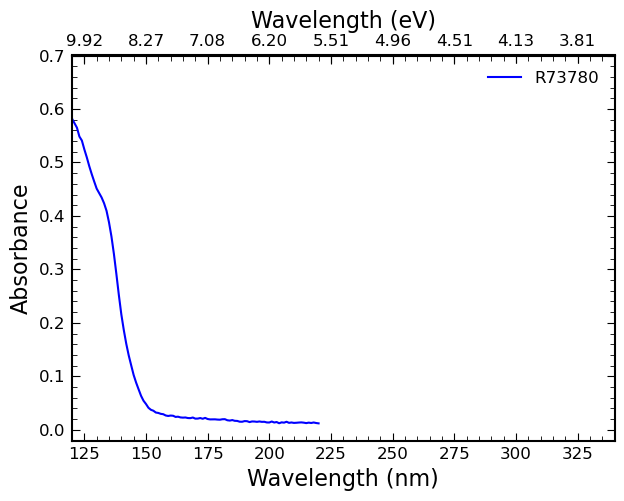

In [6]:
path = "./raw_data/SergioIoppolo-November2023/20231101/"

bkgd_short1 = path + "R73773.d01"
bkgd_short2 = path + "R73773.d02"
sample_short1 = path + "R73780.d01"
sample_short2 = path + "R73780.d02"

# build short spectrum
spec1 = tools.Spectrum()
spec1.change_name("R73780")
spec1.add_bkgd(bkgd_short1)
spec1.add_bkgd(bkgd_short2)
spec1.add_sample(sample_short1)
spec1.add_sample(sample_short2)
spec1.change_color("blue")
spec1.average_scans()

tools.plot_absorbance([spec1], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/one_spectrum.svg");

In [7]:
help(spec1)

Help on Spectrum in module tools object:

class Spectrum(builtins.object)
 |  Represents a spectrum, so the average of one or more scans
 |  
 |  Parameters belonging to the fully constructed object:
 |      
 |      baseline_p : (list) parameters from the fit of the rayleigh scattering
 |                   baseline. None until subtract_baseline() has been run.
 |      bkgds : (list) a list of background files that make up the scans.
 |      color : (str) the hex color used for plotting this spectrum.
 |      data : (pandas.DataFrame) the data belonging to this
 |             spectrum, averaged together from its corresponding
 |             scans.
 |      fit : (dict) The fitted spectrum after calling `fit_peaks()`.
 |      fit_components : (list) a list of dictionaries which make up the fit
 |                       components after `fit_peaks()` is called. Each 
 |                       dictionary has the following components: parameters,
 |                       and absorbance. The `

In [8]:
spec1.name

'R73780'

In [9]:
spec1.color

'blue'

In [10]:
spec1.data

,wavelength,absorbance
0,110.0,-0.149854
1,111.0,-0.180491
2,112.0,-0.112492
3,113.0,-0.218351
4,114.0,-0.000580
...,...,...
106,216.0,0.013420
107,217.0,0.012746
108,218.0,0.013698
109,219.0,0.012702


In [11]:
spec1.offset

0.0

In [12]:
spec1.visible

True

In [13]:
spec1.scans

[<tools.SingleScan at 0x7f4aa0396bf0>, <tools.SingleScan at 0x7f4a14ac16c0>]

In [14]:
spec1.bkgds

['./raw_data/SergioIoppolo-November2023/20231101/R73773.d01',
 './raw_data/SergioIoppolo-November2023/20231101/R73773.d02']

In [15]:
spec1.samples

['./raw_data/SergioIoppolo-November2023/20231101/R73780.d01',
 './raw_data/SergioIoppolo-November2023/20231101/R73780.d02']

## Example: Plotting Data

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


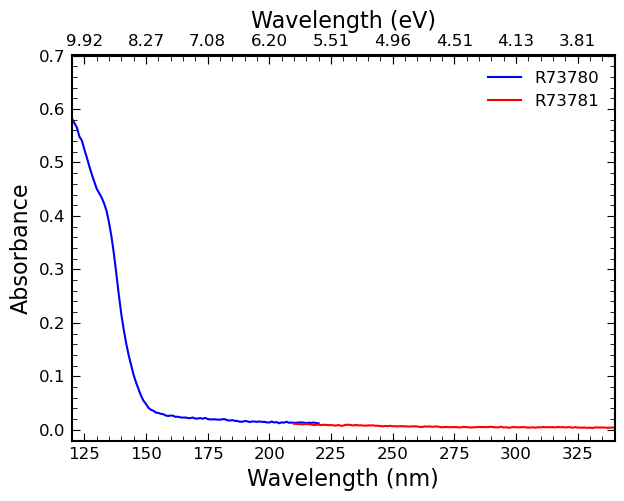

In [18]:
bkgd_long1 = path + "R73775.d01"
bkgd_long2 = path + "R73775.d02"
sample_long1 = path + "R73781.d01"
sample_long2 = path + "R73781.d02"

# build long spectrum
spec2 = tools.Spectrum()
spec2.change_name("R73781")
spec2.add_bkgd(bkgd_long1)
spec2.add_bkgd(bkgd_long2)
spec2.add_sample(sample_long1)
spec2.add_sample(sample_long2)
spec2.change_color("red")
spec2.average_scans()

tools.plot_absorbance([spec1, spec2], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/two_spectrums.svg");

## Example: Shifting Spectrums

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


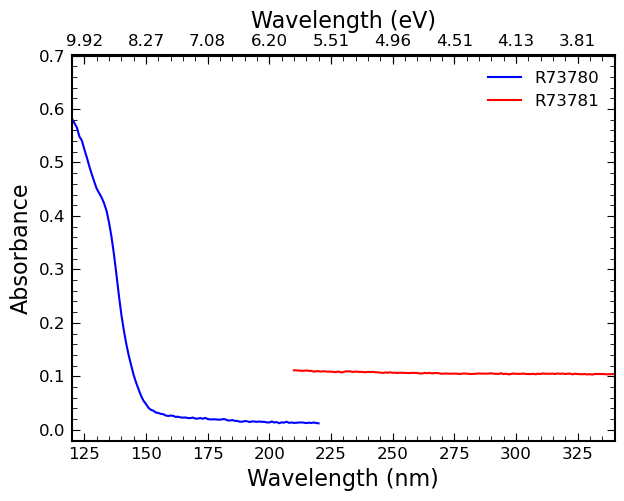

In [19]:
spec2.change_offset(0.1)

tools.plot_absorbance([spec1, spec2], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/shift_example.svg");

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


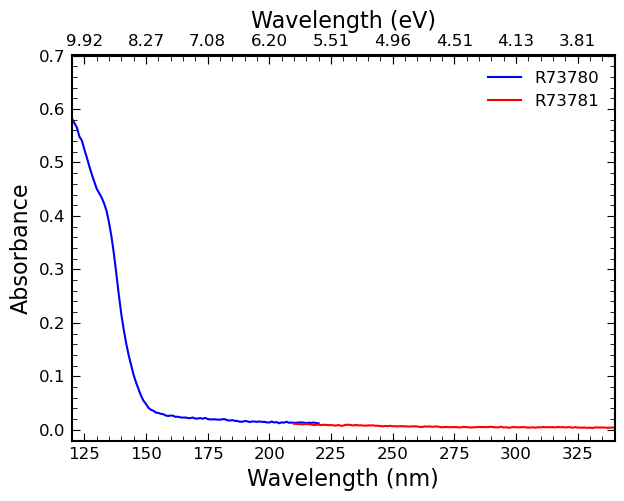

In [20]:
spec2.change_offset(0.0)

tools.plot_absorbance([spec1, spec2], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/shift_example_2.svg");

## Example: Stitching Spectra

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


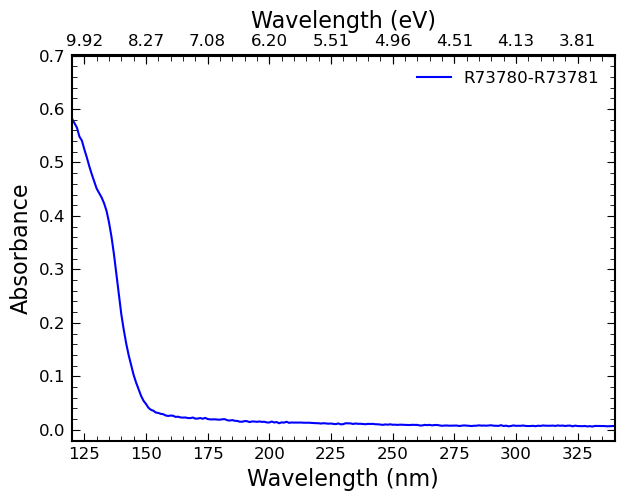

In [21]:
stitched = tools.StitchedSpectrum(spec1, spec2)

tools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/stitched.svg");

In [22]:
stitched.name

'R73780-R73781'

In [23]:
stitched.visible

True

In [24]:
stitched.color

'blue'

In [25]:
stitched.offset

0

In [26]:
stitched.scans

In [27]:
stitched.samples

['./raw_data/SergioIoppolo-November2023/20231101/R73780.d01',
 './raw_data/SergioIoppolo-November2023/20231101/R73780.d02',
 './raw_data/SergioIoppolo-November2023/20231101/R73781.d01',
 './raw_data/SergioIoppolo-November2023/20231101/R73781.d02']

In [28]:
stitched.bkgds

['./raw_data/SergioIoppolo-November2023/20231101/R73773.d01',
 './raw_data/SergioIoppolo-November2023/20231101/R73773.d02',
 './raw_data/SergioIoppolo-November2023/20231101/R73775.d01',
 './raw_data/SergioIoppolo-November2023/20231101/R73775.d02']

## Example: Changing Names

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


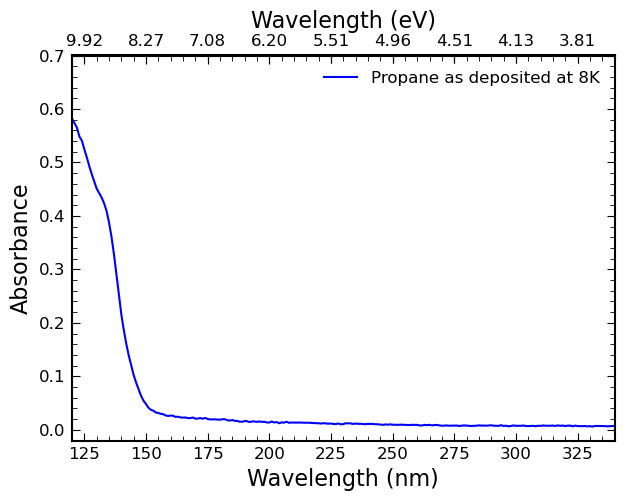

In [33]:
stitched.change_name("Propane as deposited at 8K")

tools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/name_change.svg");

## Example: Changing Colors

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


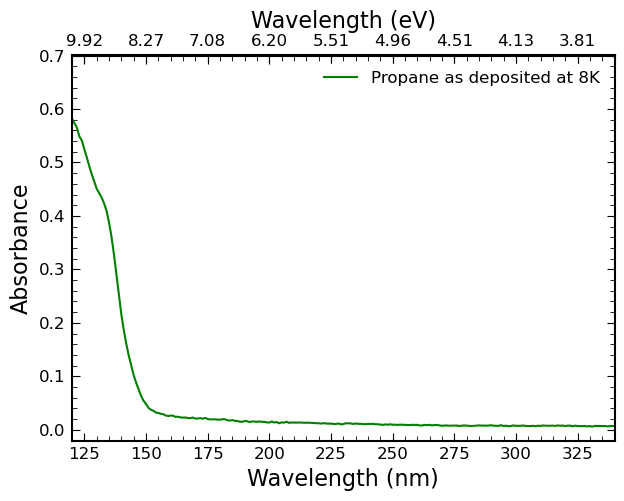

In [34]:
stitched.change_color("green")

tools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/color_change.svg");

## Example: Fitting with gaussians

In [1]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# keep things reproducable
random.seed(31415)
# define colors for plotting
colors = ["#dcdcdc", "#2f4f4f", "#a52a2a", "#191970", "#006400", "#bdb76b", "#9acd32",
"#66cdaa", "#ff0000", "#ff8c00", "#ffd700", "#c71585", "#0000cd", "#00ff00",
"#00fa9a", "#00bfff", "#ff00ff", "#dda0dd", "#7b68ee", "#ffa07a"]

def build_spectra(path, bkgd_short1, bkgd_short2, bkgd_long1, bkgd_long2,
                  sample_short1, sample_short2, sample_long1, sample_long2,
                  color="#000001", name=None):
    """
    Builds the spectra as appropriate for this experiment
    """
    # build short spectrum
    spec1 = tools.Spectrum()
    spec1.change_name(sample_short1[-9:-4])
    spec1.add_bkgd(bkgd_short1)
    spec1.add_bkgd(bkgd_short2)
    spec1.add_sample(sample_short1)
    spec1.add_sample(sample_short2)
    spec1.change_color(color)
    spec1.change_offset(0.0)
    spec1.average_scans()

    # build long spectrum
    spec2 = tools.Spectrum()
    spec2.change_name(sample_long1[-9:-4])
    spec2.add_bkgd(bkgd_long1)
    spec2.add_bkgd(bkgd_long2)
    spec2.add_sample(sample_long1)
    spec2.add_sample(sample_long2)
    spec2.change_color(color)
    spec2.change_offset(0.0)
    spec2.average_scans()

    stiched = tools.StitchedSpectrum(spec1, spec2)
    if name:
        stiched.change_name(name)
    return stiched

path = "./raw_data/SergioIoppolo-November2023/20231101/"
#save_path = "./calibrated_data/SergioIoppolo-November2023/propane/"

bkgd_short1 = path + "R73773.d01"
bkgd_short2 = path + "R73773.d02"
bkgd_long1 = path + "R73775.d01"
bkgd_long2 = path + "R73775.d02"

sample_short1 = path + "R73808.d01"
sample_short2 = path + "R73808.d02"
sample_long1 = path + "R73809.d01"
sample_long2 = path + "R73809.d02"

spec = build_spectra(path, bkgd_short1, bkgd_short2, bkgd_long1, bkgd_long2,
                        sample_short1, sample_short2, sample_long1, sample_long2,
                        color=colors[11], name="200K Propane + 50s 1keV e-")


# fix the end of the spectrum to 0
i = len(spec.data['absorbance'])
spec.change_offset(-1*spec.data['absorbance'][i-1])

Attempting fit with 1 gaussians
success! reduced chi2: 991.31
Attempting fit with 2 gaussians
success! reduced chi2: 1.74
Attempting fit with 3 gaussians
success! reduced chi2: 1.27
Attempting fit with 4 gaussians
success! reduced chi2: 1.06
Attempting fit with 5 gaussians
success! reduced chi2: 0.85
Attempting fit with 6 gaussians
success! reduced chi2: 0.76
The best fit was achieved with 4 gaussians and a reduced chi2 of 1.06


/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


(<Axes: ylabel='Absorbance'>, <Axes: xlabel='Wavelength (nm)'>)

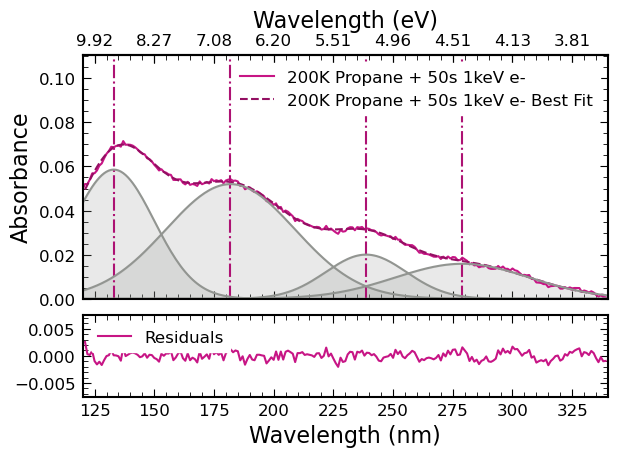

In [2]:
guesses = [{'lower':0, 'guess':4, 'upper':5},   # amplitude
           {'lower':0, 'guess':135, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':3, 'upper':5},   # amplitude
           {'lower':0, 'guess':185, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':2, 'upper':5},   # amplitude
           {'lower':225, 'guess':240, 'upper':250},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':274, 'guess':276, 'upper':279},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':296, 'guess':298, 'upper':300},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.1, 'upper':5},   # amplitude
           {'lower':324, 'guess':326, 'upper':328},   # center
           {'lower':0, 'guess':10, 'upper':100},   # standard deviation
          ]

spec.fit_peaks(verbose=True, ng_lower=1, ng_upper=7, guesses=guesses, fit_lim=(120, 340))
tools.plot_fit(spec, plot_peaks=True, xlim=(120, 340),
               ylim=(0, spec.data[spec.data['wavelength']>120]['absorbance'].max()*1.1),
               plot_fit_components=True, save_path="./misc_figures/fit.svg")

Attempting fit with 6 gaussians
success! reduced chi2: 0.75
The best fit was achieved with 6 gaussians and a reduced chi2 of 0.75


/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


(<Axes: ylabel='Absorbance'>, <Axes: xlabel='Wavelength (nm)'>)

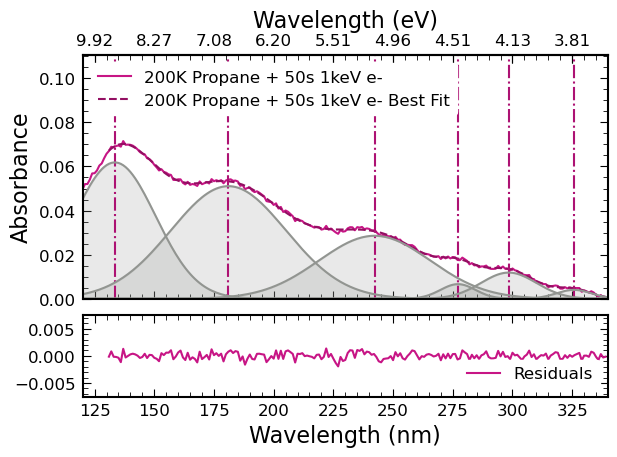

In [4]:
guesses = [{'lower':0, 'guess':4, 'upper':5},   # amplitude
           {'lower':0, 'guess':135, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':3, 'upper':5},   # amplitude
           {'lower':0, 'guess':185, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':2, 'upper':5},   # amplitude
           {'lower':225, 'guess':240, 'upper':250},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':274, 'guess':276, 'upper':279},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':296, 'guess':298, 'upper':300},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.1, 'upper':5},   # amplitude
           {'lower':324, 'guess':326, 'upper':328},   # center
           {'lower':0, 'guess':10, 'upper':100},   # standard deviation
          ]

spec.fit_peaks(verbose=True, ng_lower=1, ng_upper=7, guesses=guesses, fit_lim=(120, 340))
tools.plot_fit(spec, plot_peaks=True, xlim=(120, 340),
               ylim=(0, spec.data[spec.data['wavelength']>120]['absorbance'].max()*1.1),
               plot_fit_components=True, save_path="./misc_figures/fit_forced.svg")

In [29]:
spec.data

,wavelength,absorbance,best_fit,residuals
0,110.0,0.044227,NaN,NaN
1,111.0,0.005053,NaN,NaN
2,112.0,0.062241,NaN,NaN
3,113.0,0.017806,NaN,NaN
4,114.0,0.097399,NaN,NaN
...,...,...,...,...
226,336.0,0.030058,0.031236,-0.001178
227,337.0,0.030845,0.031092,-0.000247
228,338.0,0.029956,0.030957,-0.001001
229,339.0,0.029881,0.030829,-0.000948


In [32]:
spec.peaks

[133.03670941978515, 181.92222081560436, 238.69352885196065, 278.9999999999992]

In [33]:
spec.peak_errors

[0.3163892557277485, 0.5931870401532279, 0.7148448628674884, 2.565412028641303]

In [35]:
spec.fit_results

{'redchi2': 1.0602474276643126,
 'n': 4,
 'best_fit': 11     0.049485
 12     0.051712
 13     0.053868
 14     0.055937
 15     0.057905
          ...   
 225    0.002200
 226    0.002049
 227    0.001905
 228    0.001770
 229    0.001642
 Name: wavelength, Length: 219, dtype: float64,
 'p': array([  2.47953434, 133.03670942,  16.88599531,   3.51418325,
        181.92222082,  26.95982303,   0.84652462, 238.69352885,
         16.85857734,   1.12113086, 279.        ,  28.16441841]),
 'pcov': array([[ 1.61438678e-02,  3.60804864e-02,  4.47843076e-02,
         -2.14982583e-02,  6.84247210e-02, -1.52763007e-01,
          1.10979175e-02, -5.61208786e-02,  7.44195038e-02,
         -4.08985480e-03,  1.10517393e-01, -5.20674188e-02],
        [ 3.60804864e-02,  1.00102161e-01,  9.08559787e-02,
         -5.07386901e-02,  1.57107412e-01, -3.63634288e-01,
          2.66924947e-02, -1.34722103e-01,  1.79200582e-01,
         -9.88004068e-03,  2.66976500e-01, -1.25952139e-01],
        [ 4.47843076e-0

In [34]:
spec.fit_components

[{'parameters': array([  2.47953434, 133.03670942,  16.88599531]),
  'absorbance': 0      0.052287
  1      0.054186
  2      0.056148
  3      0.058161
  4      0.060216
           ...   
  226    0.029187
  227    0.029187
  228    0.029187
  229    0.029187
  230    0.029187
  Name: wavelength, Length: 231, dtype: float64},
 {'parameters': array([  3.51418325, 181.92222082,  26.95982303]),
  'absorbance': 0      0.030668
  1      0.030821
  2      0.030987
  3      0.031168
  4      0.031363
           ...   
  226    0.029187
  227    0.029187
  228    0.029187
  229    0.029187
  230    0.029187
  Name: wavelength, Length: 231, dtype: float64},
 {'parameters': array([  0.84652462, 238.69352885,  16.85857734]),
  'absorbance': 0      0.029187
  1      0.029187
  2      0.029187
  3      0.029187
  4      0.029187
           ...   
  226    0.029187
  227    0.029187
  228    0.029187
  229    0.029187
  230    0.029187
  Name: wavelength, Length: 231, dtype: float64},
 {'parameters

## Example: Fitting with whatever you want

Work in progress!!!!!!!! PhD applications got me all sidetracked

## Difference in Plotting Functions

## Details on the stitching algorithm